In [1]:
from chatterjee import chatt
from chatterjee import chatt_table
from chatterjee import chatt_pval
import pandas as pd
import math
import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns

The distribution and correlations of COSINE function


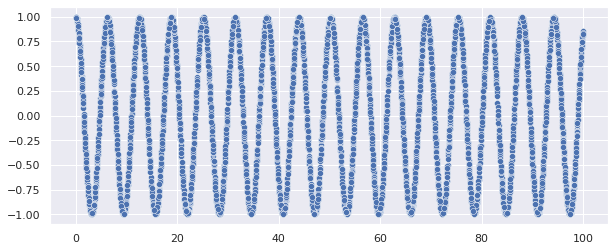

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.012474,-0.01138,-0.007714,0.990511,-0.01102


The distribution and correlations of TANGENT function


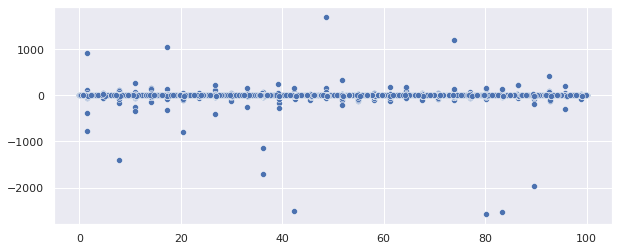

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.002746,0.001774,0.011648,0.980916,0.007044


The distribution and correlations of LOGATRITHM: function


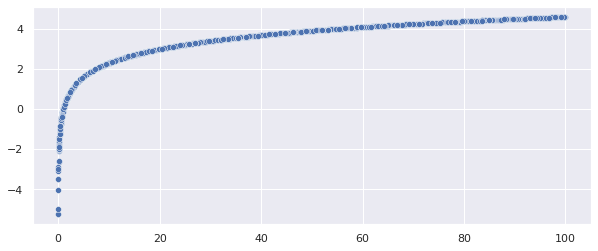

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.860008,0.999984,0.997553,0.999688,0.994803


The distribution and correlations of REVERSED SQUARE: function


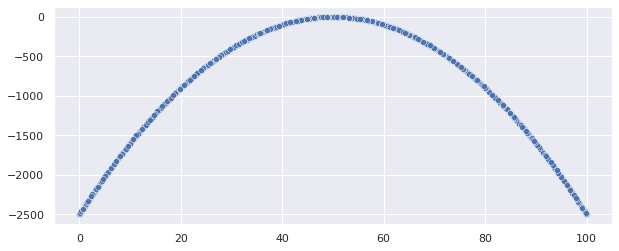

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.025904,0.025513,0.019298,0.999379,0.245896


The distribution and correlations of RANDOM function


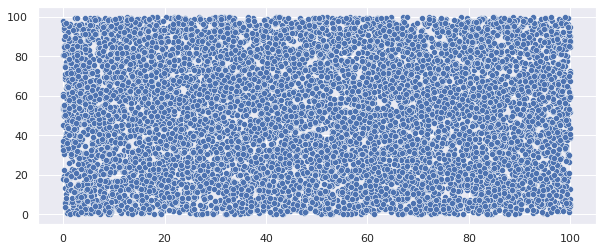

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.01779,-0.018051,-0.012064,-0.003643,-0.000211


In [5]:
# seed is start of Kazimierz IV Jagiellonczyk reign
rnd.seed = 1447

# make plots bigger
sns.set(rc={'figure.figsize':(10, 4)})

# generate data
X = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

Y_cos  = [round(math.cos(a), 2) for a in X]
Y_tan  = [round(math.tan(a), 2) for a in X]
Y_log  = [round(math.log(a), 2) for a in X]

Y_sqr  = [round(math.pow(a-50, 2)*-1, 2) for a in X]

Y_rnd = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]


dict_of_Ys = {'COSINE': Y_cos, 'TANGENT': Y_tan, 'LOGATRITHM': Y_log, 
              'REVERSED SQUARE': Y_sqr, 'RANDOM':  Y_rnd}

def add_noise(Y, noise_value):
    return [a + rnd.uniform(-noise_value, noise_value) for a in Y]

for key, Y in dict_of_Ys.items():

    # Y = add_noise(Y, 0.5)
    
    print(f'The distribution and correlations of {key} function')

    sns.scatterplot(x=X, y=Y)
    plt.show()

    dict_pd = {'X': X, 'Y': Y}
    df = pd.DataFrame(dict_pd)

    df_corr_dict = {}

    df_corr_dict['PEARSON'] = [df['X'].corr(df['Y'])]
    df_corr_dict['SPEARMAN'] = [df['X'].corr(df['Y'], method = 'spearman')]
    df_corr_dict['KENDALL'] = [df['X'].corr(df['Y'], method = 'kendall')]

    df_corr_dict['CHATTERJEE1'] = chatt(df['X'], df['Y'])
    df_corr_dict['CHATTERJEE2'] = chatt(df['Y'], df['X'])

    df_corr = pd.DataFrame(df_corr_dict)

    display(df_corr)

Tabela korelacji Spearmana


,X,Y_cos,Y_tan,Y_log,Y_sqr,Y_rnd
X,1.000000,-0.018898,-0.007861,0.999983,0.012062,-0.004619
Y_cos,-0.018898,1.000000,-0.000989,-0.018943,0.008643,0.016597
Y_tan,-0.007861,-0.000989,1.000000,-0.007955,-0.002332,-0.001377
Y_log,0.999983,-0.018943,-0.007955,1.000000,0.012112,-0.004703
Y_sqr,0.012062,0.008643,-0.002332,0.012112,1.000000,-0.014864
Y_rnd,-0.004619,0.016597,-0.001377,-0.004703,-0.014864,1.000000


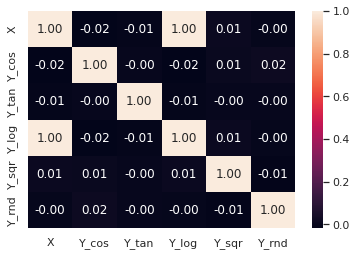


 Tabela korelacji Chatterjee


,X,Y_cos,Y_tan,Y_log,Y_sqr,Y_rnd
X,1.000000,0.014503,-0.002051,0.994696,0.256978,0.000239
Y_cos,0.990696,1.000000,0.262722,0.846390,0.767853,-0.000335
Y_tan,0.980933,0.252281,1.000000,0.719449,0.473217,-0.000107
Y_log,0.999699,0.014550,-0.002021,1.000000,0.257033,0.000225
Y_sqr,0.999398,0.014163,0.008633,0.989517,1.000000,-0.001315
Y_rnd,0.006272,0.000866,0.003955,-0.001341,-0.001934,1.000000


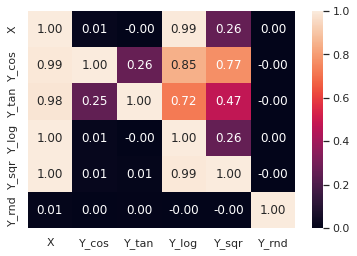

In [6]:
print('Tabela korelacji Spearmana')

display(df_vars.corr(method='spearman'))

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_vars.corr(method='spearman'), annot=True, fmt=".2f")
plt.show()

print('\n Tabela korelacji Chatterjee')

df_corr_chatt = chatt_table(df_vars)
display(df_corr_chatt)

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_corr_chatt, annot=True, fmt=".2f")
plt.show()
